In [35]:
import pandas as pd
import numpy as np



df_lampara_muestra = pd.read_csv("LamparaMuestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_lampara_no_muestra = pd.read_csv("lampara_no_muestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_no_lampara_no_muestra = pd.read_csv("no_lampara_no_muestra.csv", skiprows=33, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])
df_referencia = pd.read_csv("ThorBB2000.csv", skiprows=70, header=None, sep=';' , names=['wavelength', 'espectral_radiance'])

longitud_onda = np.array(df_lampara_muestra.iloc[:-1,0].values, dtype=float)
radiancia_lampara_muestra = df_lampara_muestra.iloc[:-1,1].values
radiancia_lampara_no_muestra = df_lampara_no_muestra.iloc[:-1,1].values
radiancia_no_lampara_no_muestra = df_no_lampara_no_muestra.iloc[:-1,1].values
radiancia_referencia = df_referencia.iloc[:-1,1].values


irradiancia_lampara = np.array(radiancia_referencia * (radiancia_lampara_muestra - radiancia_no_lampara_no_muestra) / (radiancia_lampara_no_muestra - radiancia_no_lampara_no_muestra))

3.575853267902739e-07
[321.6131287 321.7207947 321.8284607 ... 742.5361938 742.6546021
 742.7729492]


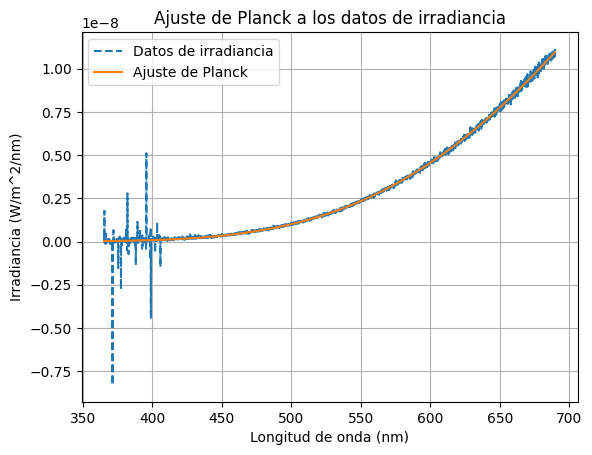

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h, c

def planck(wavelength, a, b):
    return a / ((wavelength**5) * (np.exp(b / wavelength) - 1))

popt, pcov = curve_fit(planck, longitud_onda[100:3200], irradiancia_lampara[100:3200], p0 = [1,1])
a, b = popt
h_ = a / (2*(c**2))
print(h_)
print((longitud_onda))

x = np.linspace(longitud_onda[0], longitud_onda[-1], 1000)
plt.plot(longitud_onda[400:3200], irradiancia_lampara[400:3200], '--', label='Datos de irradiancia')
plt.plot(longitud_onda[400:3200], planck(longitud_onda[400:3200], *popt), label='Ajuste de Planck')

plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Irradiancia (W/m^2/nm)')
plt.title('Ajuste de Planck a los datos de irradiancia')
plt.legend()
plt.grid()
plt.show()

In [36]:
longitud_onda[0]

np.float64(321.6131287)